In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datasetPre_path = "./DatasetPreCSV/pre1500.csv"

In [3]:
x = np.array(pd.read_csv(datasetPre_path, index_col=0))

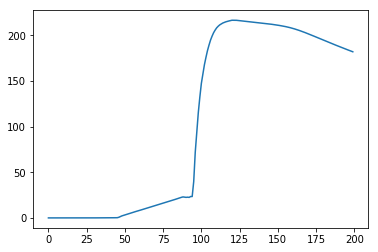

In [4]:
plt.plot(x[10,:200])

In [5]:
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Input

Using TensorFlow backend.


In [6]:
from sklearn.preprocessing import MinMaxScaler

# 数据预处理

In [7]:
mm = MinMaxScaler()
mm_x = mm.fit_transform(x)

In [8]:
X_train, X_test= train_test_split(mm_x, test_size=0.1, random_state=1024)

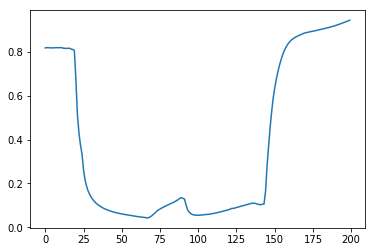

In [9]:
plt.plot(X_test[1,:200])

# 压缩特征维度至100维

In [10]:
encoding_dim = 100

# this is our input placeholder

In [11]:
inputs = Input(shape=(1500,))

# 编码层

In [12]:
encoder_output = Dense(encoding_dim, activation='sigmoid', activity_regularizer=keras.regularizers.l1(0.001))(inputs)

# 解码层

In [13]:
decoded = Dense(1500, activation='sigmoid')(encoder_output)

# 构建模型

In [14]:
autoencoder = Model(inputs=inputs, outputs=decoded)
encoder = Model(inputs=inputs, outputs=encoder_output)

In [15]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='Adadelta', loss='kullback_leibler_divergence', metrics=['accuracy'])

In [17]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               150100    
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              151500    
Total params: 301,600
Trainable params: 301,600
Non-trainable params: 0
_________________________________________________________________


# training

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=1200, batch_size=32, shuffle=True)

Epoch 1/1200
229/229 [==============================] - 1s 4ms/step - loss: 235.8398 - acc: 0.0000e+00
Epoch 2/1200
229/229 [==============================] - 0s 550us/step - loss: -81.1580 - acc: 0.0000e+00
Epoch 3/1200
229/229 [==============================] - 0s 380us/step - loss: -171.7348 - acc: 0.0000e+00
Epoch 4/1200
229/229 [==============================] - 0s 568us/step - loss: -206.1350 - acc: 0.0000e+00
Epoch 5/1200
229/229 [==============================] - 0s 367us/step - loss: -223.5493 - acc: 0.0000e+00
Epoch 6/1200
229/229 [==============================] - 0s 467us/step - loss: -234.1675 - acc: 0.0000e+00
Epoch 7/1200
229/229 [==============================] - 0s 480us/step - loss: -241.1930 - acc: 0.0000e+00
Epoch 8/1200
229/229 [==============================] - 0s 498us/step - loss: -246.3786 - acc: 0.0000e+00
Epoch 9/1200
229/229 [==============================] - 0s 432us/step - loss: -250.3878 - acc: 0.0000e+00
Epoch 10/1200
229/229 [===========================

229/229 [==============================] - 0s 507us/step - loss: -273.8355 - acc: 0.0000e+00
Epoch 78/1200
229/229 [==============================] - 0s 384us/step - loss: -273.8618 - acc: 0.0000e+00
Epoch 79/1200
229/229 [==============================] - 0s 415us/step - loss: -273.8827 - acc: 0.0000e+00
Epoch 80/1200
229/229 [==============================] - 0s 476us/step - loss: -273.9084 - acc: 0.0000e+00
Epoch 81/1200
229/229 [==============================] - 0s 411us/step - loss: -273.9292 - acc: 0.0000e+00
Epoch 82/1200
229/229 [==============================] - 0s 528us/step - loss: -273.9495 - acc: 0.0000e+00
Epoch 83/1200
229/229 [==============================] - 0s 441us/step - loss: -273.9685 - acc: 0.0000e+00
Epoch 84/1200
229/229 [==============================] - 0s 493us/step - loss: -273.9907 - acc: 0.0000e+00
Epoch 85/1200
229/229 [==============================] - 0s 424us/step - loss: -274.0088 - acc: 0.0000e+00
Epoch 86/1200
229/229 [============================

229/229 [==============================] - 0s 441us/step - loss: -274.7048 - acc: 0.0000e+00
Epoch 154/1200
229/229 [==============================] - 0s 384us/step - loss: -274.7100 - acc: 0.0000e+00
Epoch 155/1200
229/229 [==============================] - 0s 611us/step - loss: -274.7152 - acc: 0.0000e+00
Epoch 156/1200
229/229 [==============================] - 0s 362us/step - loss: -274.7204 - acc: 0.0000e+00
Epoch 157/1200
229/229 [==============================] - 0s 607us/step - loss: -274.7260 - acc: 0.0044
Epoch 158/1200
229/229 [==============================] - 0s 463us/step - loss: -274.7316 - acc: 0.0044
Epoch 159/1200
229/229 [==============================] - 0s 485us/step - loss: -274.7377 - acc: 0.0044
Epoch 160/1200
229/229 [==============================] - 0s 397us/step - loss: -274.7421 - acc: 0.0044
Epoch 161/1200
229/229 [==============================] - 0s 537us/step - loss: -274.7476 - acc: 0.0044
Epoch 162/1200
229/229 [==============================] - 0s 38

229/229 [==============================] - 0s 428us/step - loss: -275.0097 - acc: 0.0000e+00
Epoch 230/1200
229/229 [==============================] - 0s 498us/step - loss: -275.0124 - acc: 0.0000e+00
Epoch 231/1200
229/229 [==============================] - 0s 236us/step - loss: -275.0155 - acc: 0.0000e+00
Epoch 232/1200
229/229 [==============================] - 0s 502us/step - loss: -275.0182 - acc: 0.0000e+00
Epoch 233/1200
229/229 [==============================] - 0s 402us/step - loss: -275.0208 - acc: 0.0000e+00
Epoch 234/1200
229/229 [==============================] - 0s 576us/step - loss: -275.0230 - acc: 0.0000e+00
Epoch 235/1200
229/229 [==============================] - 0s 345us/step - loss: -275.0271 - acc: 0.0000e+00
Epoch 236/1200
229/229 [==============================] - 0s 480us/step - loss: -275.0297 - acc: 0.0000e+00
Epoch 237/1200
229/229 [==============================] - 0s 415us/step - loss: -275.0316 - acc: 0.0000e+00
Epoch 238/1200
229/229 [===================

229/229 [==============================] - 0s 472us/step - loss: -275.1826 - acc: 0.0000e+00
Epoch 306/1200
229/229 [==============================] - 0s 384us/step - loss: -275.1840 - acc: 0.0000e+00
Epoch 307/1200
229/229 [==============================] - 0s 397us/step - loss: -275.1858 - acc: 0.0000e+00
Epoch 308/1200
229/229 [==============================] - 0s 502us/step - loss: -275.1876 - acc: 0.0000e+00
Epoch 309/1200
229/229 [==============================] - 0s 432us/step - loss: -275.1883 - acc: 0.0000e+00
Epoch 310/1200
229/229 [==============================] - 0s 450us/step - loss: -275.1913 - acc: 0.0000e+00
Epoch 311/1200
229/229 [==============================] - 0s 192us/step - loss: -275.1927 - acc: 0.0000e+00
Epoch 312/1200
229/229 [==============================] - 0s 528us/step - loss: -275.1939 - acc: 0.0000e+00
Epoch 313/1200
229/229 [==============================] - 0s 367us/step - loss: -275.1954 - acc: 0.0000e+00
Epoch 314/1200
229/229 [===================

229/229 [==============================] - 0s 354us/step - loss: -275.2913 - acc: 0.0000e+00
Epoch 381/1200
229/229 [==============================] - 0s 437us/step - loss: -275.2923 - acc: 0.0000e+00
Epoch 382/1200
229/229 [==============================] - 0s 419us/step - loss: -275.2935 - acc: 0.0000e+00
Epoch 383/1200
229/229 [==============================] - 0s 459us/step - loss: -275.2948 - acc: 0.0000e+00
Epoch 384/1200
229/229 [==============================] - 0s 406us/step - loss: -275.2957 - acc: 0.0000e+00
Epoch 385/1200
229/229 [==============================] - 0s 393us/step - loss: -275.2968 - acc: 0.0000e+00
Epoch 386/1200
229/229 [==============================] - 0s 502us/step - loss: -275.2981 - acc: 0.0000e+000s - loss: -281.4272 - acc: 0.0000e+
Epoch 387/1200
229/229 [==============================] - 0s 411us/step - loss: -275.2991 - acc: 0.0000e+00
Epoch 388/1200
229/229 [==============================] - 0s 467us/step - loss: -275.3003 - acc: 0.0000e+00
Epoch 3

Epoch 457/1200
229/229 [==============================] - 0s 480us/step - loss: -275.3719 - acc: 0.0000e+00
Epoch 458/1200
229/229 [==============================] - 0s 245us/step - loss: -275.3731 - acc: 0.0000e+00
Epoch 459/1200
229/229 [==============================] - 0s 485us/step - loss: -275.3735 - acc: 0.0000e+00
Epoch 460/1200
229/229 [==============================] - 0s 402us/step - loss: -275.3748 - acc: 0.0000e+00
Epoch 461/1200
229/229 [==============================] - 0s 467us/step - loss: -275.3754 - acc: 0.0000e+00
Epoch 462/1200
229/229 [==============================] - 0s 384us/step - loss: -275.3766 - acc: 0.0000e+00
Epoch 463/1200
229/229 [==============================] - 0s 393us/step - loss: -275.3776 - acc: 0.0000e+00
Epoch 464/1200
229/229 [==============================] - 0s 489us/step - loss: -275.3777 - acc: 0.0000e+00
Epoch 465/1200
229/229 [==============================] - 0s 341us/step - loss: -275.3790 - acc: 0.0000e+00
Epoch 466/1200
229/229 [====

229/229 [==============================] - 0s 192us/step - loss: -275.4322 - acc: 0.0000e+00
Epoch 533/1200
229/229 [==============================] - 0s 450us/step - loss: -275.4334 - acc: 0.0000e+00
Epoch 534/1200
229/229 [==============================] - 0s 402us/step - loss: -275.4335 - acc: 0.0000e+00
Epoch 535/1200
229/229 [==============================] - 0s 411us/step - loss: -275.4345 - acc: 0.0000e+00
Epoch 536/1200
229/229 [==============================] - 0s 507us/step - loss: -275.4346 - acc: 0.0000e+00
Epoch 537/1200
229/229 [==============================] - 0s 249us/step - loss: -275.4364 - acc: 0.0000e+00
Epoch 538/1200
229/229 [==============================] - 0s 555us/step - loss: -275.4364 - acc: 0.0000e+00
Epoch 539/1200
229/229 [==============================] - 0s 258us/step - loss: -275.4378 - acc: 0.0000e+00
Epoch 540/1200
229/229 [==============================] - 0s 507us/step - loss: -275.4386 - acc: 0.0000e+00
Epoch 541/1200
229/229 [===================

229/229 [==============================] - 0s 406us/step - loss: -275.4806 - acc: 0.0000e+00
Epoch 608/1200
229/229 [==============================] - 0s 419us/step - loss: -275.4812 - acc: 0.0000e+00
Epoch 609/1200
229/229 [==============================] - 0s 450us/step - loss: -275.4818 - acc: 0.0000e+00
Epoch 610/1200
229/229 [==============================] - 0s 428us/step - loss: -275.4823 - acc: 0.0000e+00
Epoch 611/1200
229/229 [==============================] - 0s 428us/step - loss: -275.4828 - acc: 0.0000e+000s - loss: -271.5695 - acc: 0.0000e+
Epoch 612/1200
229/229 [==============================] - 0s 411us/step - loss: -275.4835 - acc: 0.0000e+00
Epoch 613/1200
229/229 [==============================] - 0s 459us/step - loss: -275.4842 - acc: 0.0000e+00
Epoch 614/1200
229/229 [==============================] - ETA: 0s - loss: -280.5561 - acc: 0.0000e+ - 0s 223us/step - loss: -275.4846 - acc: 0.0000e+00
Epoch 615/1200
229/229 [==============================] - 0s 441us/step

229/229 [==============================] - 0s 310us/step - loss: -275.5204 - acc: 0.0087
Epoch 684/1200
229/229 [==============================] - 0s 445us/step - loss: -275.5209 - acc: 0.0087
Epoch 685/1200
229/229 [==============================] - 0s 432us/step - loss: -275.5214 - acc: 0.0131
Epoch 686/1200
229/229 [==============================] - 0s 393us/step - loss: -275.5220 - acc: 0.0087
Epoch 687/1200
229/229 [==============================] - 0s 480us/step - loss: -275.5228 - acc: 0.0087
Epoch 688/1200
229/229 [==============================] - 0s 358us/step - loss: -275.5233 - acc: 0.0131
Epoch 689/1200
229/229 [==============================] - 0s 498us/step - loss: -275.5233 - acc: 0.0044
Epoch 690/1200
229/229 [==============================] - 0s 262us/step - loss: -275.5239 - acc: 0.0131
Epoch 691/1200
229/229 [==============================] - 0s 445us/step - loss: -275.5246 - acc: 0.0000e+00
Epoch 692/1200
229/229 [==============================] - 0s 240us/step - l

Epoch 759/1200
229/229 [==============================] - 0s 419us/step - loss: -275.5547 - acc: 0.0000e+00
Epoch 760/1200
229/229 [==============================] - 0s 437us/step - loss: -275.5550 - acc: 0.0000e+00
Epoch 761/1200
229/229 [==============================] - 0s 454us/step - loss: -275.5554 - acc: 0.0000e+00
Epoch 762/1200
229/229 [==============================] - 0s 463us/step - loss: -275.5556 - acc: 0.0000e+00
Epoch 763/1200
229/229 [==============================] - 0s 432us/step - loss: -275.5566 - acc: 0.0000e+00
Epoch 764/1200
229/229 [==============================] - 0s 450us/step - loss: -275.5569 - acc: 0.0000e+00
Epoch 765/1200
229/229 [==============================] - 0s 428us/step - loss: -275.5571 - acc: 0.0000e+00
Epoch 766/1200
229/229 [==============================] - 0s 397us/step - loss: -275.5574 - acc: 0.0000e+00
Epoch 767/1200
229/229 [==============================] - 0s 476us/step - loss: -275.5580 - acc: 0.0000e+00
Epoch 768/1200
229/229 [====

229/229 [==============================] - 0s 459us/step - loss: -275.5843 - acc: 0.0000e+00
Epoch 835/1200
229/229 [==============================] - 0s 253us/step - loss: -275.5840 - acc: 0.0000e+00
Epoch 836/1200
229/229 [==============================] - 0s 437us/step - loss: -275.5850 - acc: 0.0000e+00
Epoch 837/1200
229/229 [==============================] - 0s 411us/step - loss: -275.5854 - acc: 0.0000e+00
Epoch 838/1200
229/229 [==============================] - 0s 472us/step - loss: -275.5855 - acc: 0.0000e+00
Epoch 839/1200
229/229 [==============================] - 0s 445us/step - loss: -275.5862 - acc: 0.0000e+00
Epoch 840/1200
229/229 [==============================] - 0s 568us/step - loss: -275.5863 - acc: 0.0000e+00
Epoch 841/1200
229/229 [==============================] - 0s 397us/step - loss: -275.5863 - acc: 0.0000e+00
Epoch 842/1200
229/229 [==============================] - 0s 485us/step - loss: -275.5873 - acc: 0.0000e+00
Epoch 843/1200
229/229 [===================

229/229 [==============================] - 0s 432us/step - loss: -275.6097 - acc: 0.0000e+00
Epoch 910/1200
229/229 [==============================] - 0s 489us/step - loss: -275.6102 - acc: 0.0000e+00
Epoch 911/1200
229/229 [==============================] - 0s 249us/step - loss: -275.6103 - acc: 0.0000e+00
Epoch 912/1200
229/229 [==============================] - 0s 520us/step - loss: -275.6107 - acc: 0.0000e+00
Epoch 913/1200
229/229 [==============================] - 0s 192us/step - loss: -275.6113 - acc: 0.0000e+00
Epoch 914/1200
229/229 [==============================] - 0s 533us/step - loss: -275.6112 - acc: 0.0000e+00
Epoch 915/1200
229/229 [==============================] - 0s 310us/step - loss: -275.6108 - acc: 0.0000e+00
Epoch 916/1200
229/229 [==============================] - 0s 616us/step - loss: -275.6120 - acc: 0.0000e+000s - loss: -280.8059 - acc: 0.0000e+
Epoch 917/1200
229/229 [==============================] - 0s 284us/step - loss: -275.6122 - acc: 0.0000e+00
Epoch 9

229/229 [==============================] - 0s 249us/step - loss: -275.6320 - acc: 0.0000e+00
Epoch 985/1200
229/229 [==============================] - 0s 537us/step - loss: -275.6322 - acc: 0.0000e+00
Epoch 986/1200
229/229 [==============================] - 0s 345us/step - loss: -275.6327 - acc: 0.0000e+00
Epoch 987/1200
229/229 [==============================] - 0s 384us/step - loss: -275.6330 - acc: 0.0000e+00
Epoch 988/1200
229/229 [==============================] - 0s 507us/step - loss: -275.6331 - acc: 0.0000e+00
Epoch 989/1200
229/229 [==============================] - 0s 550us/step - loss: -275.6333 - acc: 0.0000e+00
Epoch 990/1200
229/229 [==============================] - 0s 459us/step - loss: -275.6339 - acc: 0.0000e+00
Epoch 991/1200
229/229 [==============================] - 0s 345us/step - loss: -275.6339 - acc: 0.0000e+00
Epoch 992/1200
229/229 [==============================] - 0s 559us/step - loss: -275.6338 - acc: 0.0000e+00
Epoch 993/1200
229/229 [===================

229/229 [==============================] - 0s 376us/step - loss: -275.6523 - acc: 0.0000e+00
Epoch 1059/1200
229/229 [==============================] - 0s 642us/step - loss: -275.6524 - acc: 0.0000e+00
Epoch 1060/1200
229/229 [==============================] - 0s 638us/step - loss: -275.6527 - acc: 0.0000e+00
Epoch 1061/1200
229/229 [==============================] - 0s 467us/step - loss: -275.6533 - acc: 0.0000e+00
Epoch 1062/1200
229/229 [==============================] - 0s 493us/step - loss: -275.6529 - acc: 0.0000e+00
Epoch 1063/1200
229/229 [==============================] - 0s 520us/step - loss: -275.6533 - acc: 0.0000e+00
Epoch 1064/1200
229/229 [==============================] - 0s 463us/step - loss: -275.6533 - acc: 0.0000e+00
Epoch 1065/1200
229/229 [==============================] - 0s 493us/step - loss: -275.6538 - acc: 0.0000e+00
Epoch 1066/1200
229/229 [==============================] - 0s 445us/step - loss: -275.6542 - acc: 0.0000e+00
Epoch 1067/1200
229/229 [==========

# LOSS

In [ ]:
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['acc']
# val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predict_encoder = encoder.predict(X_test)

In [ ]:
predict_decoded = decoder.predict(predict_encoder)

In [ ]:
predict_decoded.shape

In [ ]:
plt.plot(predict_decoded[1,:200])

In [ ]:
encoder.get_layer('dense_1').get_weights()[0].shape

In [ ]:
plt.plot(encoder.get_layer('dense_1').get_weights()[0][:200,1])